## Part 1.5 - Deeper network
#### *Pol Roca Llaberia*

In this experiment we will test with two deeper networks, and then analyze whether or not a more complex network can be the solution to the lack of data.

The first network will have an additional convolutional+pooling layer, and the second one will have two pairs of those layers.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
N = 300

In [4]:
X_train = X_train[:N]
y_train = y_train[:N]
X_test = X_test[:2500]
y_test = y_test[:2500]

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [5]:
print(X_train.shape)
print(X_test.shape)
np.unique(y_test, return_counts=True)

(300, 28, 28, 1)
(2500, 28, 28, 1)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([219, 287, 276, 254, 275, 221, 225, 257, 242, 244]))

In [6]:
def build_model_baseline():
    model = models.Sequential(name='baseline')
    model.add(layers.Conv2D(20, (5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(num_classes))
    return model

def build_model_deeper1():
    model = models.Sequential(name='deeper1')
    model.add(layers.Conv2D(20, (5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(num_classes))
    return model

def build_model_deeper2():
    model = models.Sequential(name='deeper2')
    model.add(layers.Conv2D(20, (5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    # this pooling will be (3, 3) because its input shape is (3, 3)
    # and otherwise we would loose one full col/row with a
    # (2, 2) filter and stride 2
    model.add(layers.MaxPooling2D((3, 3)))
    model.add(layers.Flatten())
    model.add(layers.Dense(num_classes))
    return model

In [7]:
model_baseline = build_model_baseline()
model_deeper1 = build_model_deeper1()
model_deeper2 = build_model_deeper2()

print(model_baseline.summary(), '\n\n')
print(model_deeper1.summary(), '\n\n')
print(model_deeper2.summary())

Model: "baseline"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2880)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                28810     
Total params: 29,330
Trainable params: 29,330
Non-trainable params: 0
_________________________________________________________________
None 


Model: "deeper1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 20)        520       
_____________________________

In [8]:
 for model in [model_baseline, model_deeper1, model_deeper2]:
    model.compile(optimizer='SGD',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])


In [9]:
histories = []
metrics = []
epochs = 70

for model in [model_baseline, model_deeper1, model_deeper2]:
    history = model.fit(X_train, 
                        y_train, 
                        epochs=epochs, 
                        batch_size=32, 
                        validation_data=(X_test, y_test), 
                        verbose=1)
    histories.append(history.history)
    metrics.append(model.evaluate(X_test,  y_test))

Epoch 1/70
10/10 [==============================] - 32s 64ms/step - loss: 244.0020 - accuracy: 0.1518 - val_loss: 2.2933 - val_accuracy: 0.1580
Epoch 2/70
10/10 [==============================] - 0s 19ms/step - loss: 2.2542 - accuracy: 0.1400 - val_loss: 2.2623 - val_accuracy: 0.1912
Epoch 3/70
10/10 [==============================] - 0s 19ms/step - loss: 1.9632 - accuracy: 0.3750 - val_loss: 2.5770 - val_accuracy: 0.1804
Epoch 4/70
10/10 [==============================] - 0s 18ms/step - loss: 1.7349 - accuracy: 0.4312 - val_loss: 2.0363 - val_accuracy: 0.4424
Epoch 5/70
10/10 [==============================] - 0s 19ms/step - loss: 0.8347 - accuracy: 0.7140 - val_loss: 2.0438 - val_accuracy: 0.5064
Epoch 6/70
10/10 [==============================] - 0s 19ms/step - loss: 0.7706 - accuracy: 0.7452 - val_loss: 1.6225 - val_accuracy: 0.5040
Epoch 7/70
10/10 [==============================] - 0s 21ms/step - loss: 0.3958 - accuracy: 0.8728 - val_loss: 2.2411 - val_accuracy: 0.5824
Epoch 8/70

In [10]:
for loss, acc in np.round(metrics, 2):
    print(f'loss: {loss:.2f} accuracy: {acc:.2f}')

loss: 2.63 accuracy: 0.67
loss: 2.30 accuracy: 0.11
loss: 2.30 accuracy: 0.11


In [11]:
def plot_curves(history, axes, title=''):
    # plot accuracy
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    epochs = range(1, len(acc)+1)

    ax = axes[0]
    ax.plot(epochs, acc, 'b', label='Training Acc')
    ax.plot(epochs, val_acc, 'r', label='Validation Acc')
    ax.set_title('Accuracy curves | ' + title)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.grid(alpha=0.4)
    ax.legend()

    # plot validation loss
    loss = history['loss']
    val_loss = history['val_loss']

    ax = axes[1]
    ax.plot(epochs, loss, 'b', label='Training loss')
    ax.plot(epochs, val_loss, 'r', label='Validation loss')
    ax.set_title('Loss curves | ' + title)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.grid(alpha=0.4)
    ax.legend()

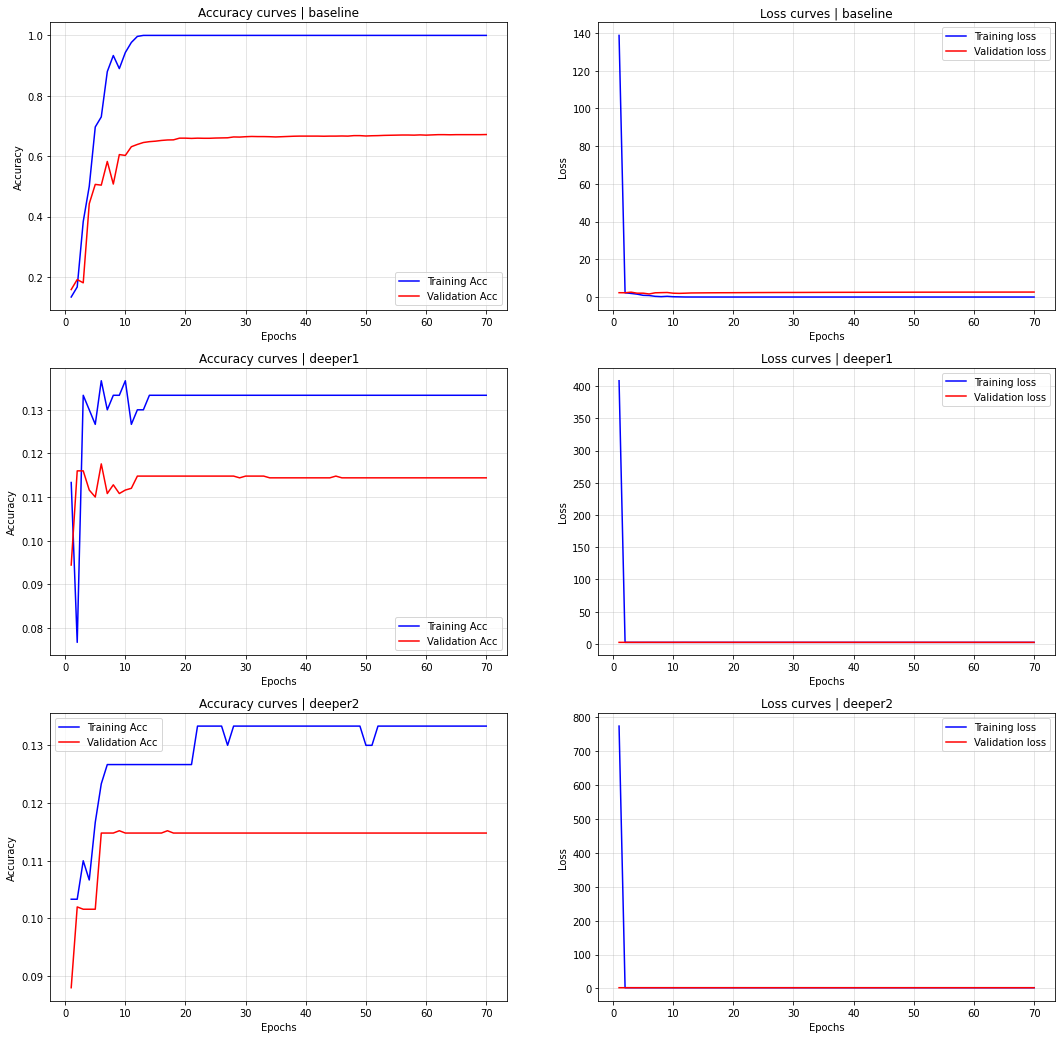

In [12]:
fig, axes = plt.subplots(len(histories), 2, figsize=(18, 6*len(histories)))

for i, title in enumerate(['baseline', 'deeper1', 'deeper2']):
    plot_curves(histories[i], axes[i], title)

plt.show()

### Observations

It is easy to see that, in this case, the improvement proposals did not achieve the desired results. One could say that with that low amount of data and higher amount of parameters that the deeper networks have, the performance can only decrease - and I would second that affirmation. However, while the deepest model has almost the double amount of parameters than the other two, the first deeper model (with only 1 pair of additional layers) has just as much parameters as the baseline model, and even less. 

In my opinion I still think that increasing the complexity of a model makes it more data demanding. Despite that, I can see now that the complexity of a model is not strictly related to the number of parameters, but instead it is more connected to the number of steps or layers, and that is why in this case the performance decreased by so much.

---